In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import math

datos = pd.read_csv('delivery_dataset.csv',sep=';')
datos = datos.replace('NA',np.nan)

In [ ]:
def tarde_y_demora(ano, mes, datos):
    carga_mensual = datos[datos.Year == ano]
    carga_mensual = carga_mensual[carga_mensual.Month == mes]
    # plt.subplots(figsize=(15, 7))
    try:
        plt.bar('tarde y Demora', carga_mensual['tarde_y_demora'][carga_mensual.tarde_y_demora == 1].value_counts(),
                width=0.8,
                label=str(carga_mensual['tarde_y_demora'][carga_mensual.tarde_y_demora == 1].value_counts()[
                              1]) + ' salida: tarde\nllegada: demorada',
                align='center')
        plt.legend(loc="upper left", bbox_to_anchor=(1.0, 1.05), shadow=True)

    except:
        plt.bar('tarde y Demora', 0,
                width=0.8,
                label=str(0) + ' salida: tarde\nllegada: demorada',
                align='center')
        plt.legend(loc="upper left", bbox_to_anchor=(1.0, 1.05), shadow=True)


def tarde_y_atiempo(ano, mes, datos):
    carga_mensual = datos[datos.Year == ano]
    carga_mensual = carga_mensual[carga_mensual.Month == mes]
    # plt.subplots(figsize=(15, 7))
    try:
        plt.bar('tarde y a tiempo', carga_mensual['tarde_y_atiempo'][carga_mensual.tarde_y_atiempo == 1].value_counts(),
                width=0.8,
                label=str(
                    carga_mensual['tarde_y_atiempo'][carga_mensual.tarde_y_atiempo == 1].value_counts()[
                        1]) + ' salida: tarde\nllegada: a tiempo',
                align='center')
        plt.legend(loc="upper left", bbox_to_anchor=(1.0, 1.05), shadow=True)
    except:
        plt.bar('tarde y a tiempo', 0,
                width=0.8,
                label=str(
                    0) + ' salida: tarde\nllegada: a tiempo',
                align='center')
        plt.legend(loc="upper left", bbox_to_anchor=(1.0, 1.05), shadow=True)



def temprano_y_atiempo(ano, mes, datos):
    carga_mensual = datos[datos.Year == ano]
    carga_mensual = carga_mensual[carga_mensual.Month == mes]
    plt.subplots(figsize=(15, 7))
    try:
        plt.bar('temprano y a tiempo',
                carga_mensual['temprano_y_atiempo'][carga_mensual.temprano_y_atiempo == 1].value_counts(),
                width=0.8,
                label=str(
                    carga_mensual['temprano_y_atiempo'][carga_mensual.temprano_y_atiempo == 1].value_counts()[
                        1]) + ' salida: temprana\nllegada: a tiempo',
                align='center')
        plt.legend(loc="upper left", bbox_to_anchor=(1.0, 1.05), shadow=True)
    except:
        plt.bar('temprano y a tiempo',
                0,
                width=0.8,
                label=str(
                    0) + ' salida: temprana\nllegada: a tiempo',
                align='center')
        plt.legend(loc="upper left", bbox_to_anchor=(1.0, 1.05), shadow=True)


def temprano_y_demora(ano, mes, datos):
    carga_mensual = datos[datos.Year == ano]
    carga_mensual = carga_mensual[carga_mensual.Month == mes]
    # plt.subplots(figsize=(15, 7))
    try:
        plt.bar('temprano_y_demora',
                carga_mensual['temprano_y_demora'][carga_mensual.temprano_y_demora == 1].value_counts(),
                width=0.8,
                label=str(
                    carga_mensual['temprano_y_demora'][carga_mensual.temprano_y_demora == 1].value_counts()[
                        1]) + ' atiempo',
                align='center')
        plt.legend(loc="upper left", bbox_to_anchor=(1.0, 1.05), shadow=True)
    except:
        plt.bar('temprano_y_demora',
                0,
                width=0.8,
                label=str(
                    0) + ' atiempo',
                align='center')
        plt.legend(loc="upper left", bbox_to_anchor=(1.0, 1.05), shadow=True)
def tarde_demora(a, b):
    return 1 if a > 0 and b == 1 else 0


def temprano_demora(a, b):
    return 1 if a <= 0 and b == 1 else 0


def tarde_atiempo(a, b):
    return 1 if a > 0 and b == 0 else 0


def temprano_atiempo(a, b):
    return 1 if a <= 0 and b == 0 else 0
carga_mensual = pd.DataFrame(datos[datos.Year == 2020])
carga_mensual = pd.DataFrame(carga_mensual[carga_mensual.Month == 1])
carga_mensual = pd.DataFrame(carga_mensual.dropna())
carga_mensual.index = [i for i in range(len(carga_mensual.index))]
carga_mensual['tarde_y_demora'] = carga_mensual.apply(lambda x: tarde_demora(x['Shipment_Delay'], x['Delivery_Status']),
                                                      axis=1)
carga_mensual['temprano_y_demora'] = carga_mensual.apply(
    lambda x: temprano_demora(x['Shipment_Delay'], x['Delivery_Status']), axis=1)
carga_mensual['tarde_y_atiempo'] = carga_mensual.apply(
    lambda x: tarde_atiempo(x['Shipment_Delay'], x['Delivery_Status']), axis=1)
carga_mensual['temprano_y_atiempo'] = carga_mensual.apply(
    lambda x: temprano_atiempo(x['Shipment_Delay'], x['Delivery_Status']), axis=1)

temprano_y_atiempo(2020,1,carga_mensual)
tarde_y_atiempo(2020,1,carga_mensual)
temprano_y_demora(2020,1,carga_mensual)
tarde_y_demora(2020,1,carga_mensual)
plt.savefig('relacion_salida_llegada.png')
plt.show()


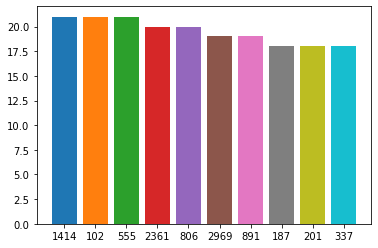

In [164]:
def mayor_entregas(ano, mes, datos):
    carga_mensual = datos[datos.Year == ano]
    carga_mensual = carga_mensual[carga_mensual.Month == mes]
    for i, v in enumerate(carga_mensual['Carrier_Num'].value_counts().head(10).index.tolist()):
        plt.bar(str(v), carga_mensual['Carrier_Num'].value_counts()[v], width=0.8)
    plt.savefig('mayor-entregas.png')
mayor_entregas(2020,1,datos)


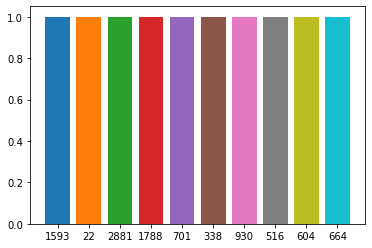

In [70]:
def menor_entregas(ano, mes, datos):
    carga_mensual = datos[datos.Year == ano]
    carga_mensual = carga_mensual[carga_mensual.Month == mes]
    for i, v in enumerate(carga_mensual['Carrier_Num'].value_counts().tail(10).index.tolist()):
        plt.bar(str(v), carga_mensual['Carrier_Num'].value_counts()[v], width=0.8)
    plt.savefig('menor-entregas.png')
menor_entregas(2020,1,datos)

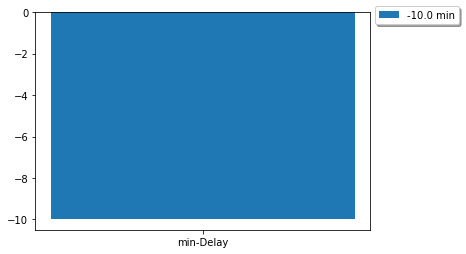

In [71]:
def min_delay(ano, mes, datos):
    carga_mensual = datos[datos.Year == ano]
    carga_mensual = carga_mensual[carga_mensual.Month == mes]
    plt.bar('min-Delay', carga_mensual['Shipment_Delay'].min(), width=0.8,
            label=str(carga_mensual['Shipment_Delay'].min()) + ' min',
            align='center')
    plt.legend(loc="upper left", bbox_to_anchor=(1.0, 1.05), shadow=True)
    
min_delay(2020,1,datos)

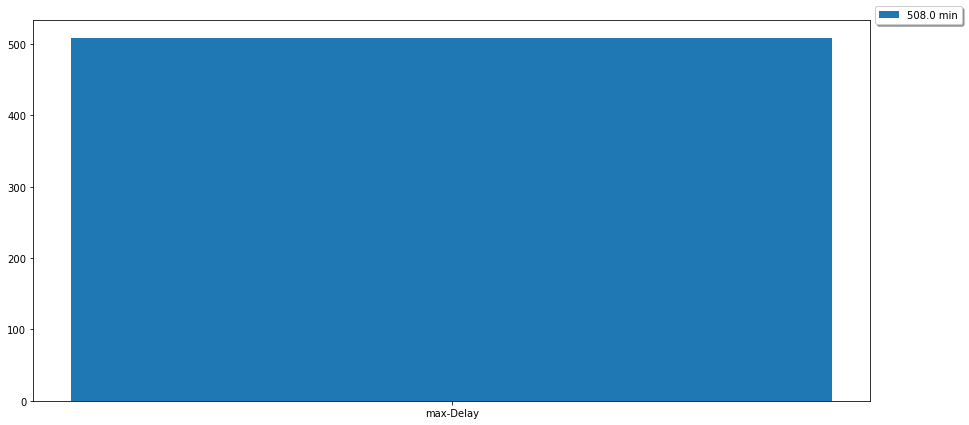

In [72]:
def max_delay(ano, mes, datos):
    carga_mensual = datos[datos.Year == ano]
    carga_mensual = carga_mensual[carga_mensual.Month == mes]
    plt.subplots(figsize=(15, 7))
    plt.bar('max-Delay', carga_mensual['Shipment_Delay'].max(), width=0.8,
            label=str(carga_mensual['Shipment_Delay'].max()) + ' min',
            align='center')
    plt.legend(loc="upper left", bbox_to_anchor=(1.0, 1.05), shadow=True)
    
max_delay(2020,1,datos)
plt.savefig('max-min-delay.png')

3488

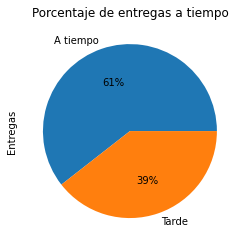

In [137]:
def entregas_a_tiempo_mes(year,month,datos):
    on_time = datos[datos.Year==year][datos.Month==month]['Delivery_Status'].dropna().value_counts()
    on_time.plot(kind='pie',title='Porcentaje de entregas a tiempo',labels=['A tiempo','Tarde'],ylabel='Entregas',autopct='%1.0f%%',)
    plt.savefig('primera.png')
    
def cant_entregas_a_tiempo_mes(year,month,datos):
    return int(datos[datos.Year==year][datos.Month==month][datos.Delivery_Status == 0]['Delivery_Status'].dropna().value_counts())
    
def cant_entregas_tarde_mes(year,month,datos):
    return int(datos[datos.Year==year][datos.Month==month][datos.Delivery_Status == 1]['Delivery_Status'].dropna().value_counts())
    
entregas_a_tiempo_mes(2020,1,datos)

cant_entregas_a_tiempo_mes(2020,1,datos)

cant_entregas_tarde_mes(2020,1,datos)

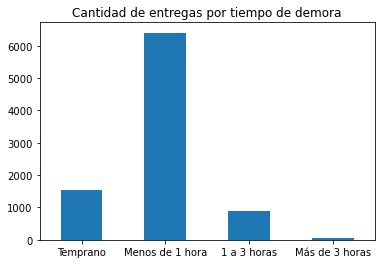

In [138]:
def demoras(year,month,datos):
    Shipment_Delay = datos[datos.Year==year][datos.Month==month]['Shipment_Delay'].dropna().value_counts()
    Shipment_Delay=pd.DataFrame(data=[Shipment_Delay[Shipment_Delay.index<0].sum(),Shipment_Delay.loc[(Shipment_Delay.index>=0) & (Shipment_Delay.index<=60)].sum(),Shipment_Delay.loc[(Shipment_Delay.index>=60) & (Shipment_Delay.index<=180)].sum(),Shipment_Delay[Shipment_Delay.index>180].sum()], index=['Temprano','Menos de 1 hora','1 a 3 horas','Más de 3 horas'])
    Shipment_Delay.plot(kind='bar',title='Cantidad de entregas por tiempo de demora',rot=0, legend=None)
    plt.savefig('segunda.png')
    
demoras(2020,1,datos)

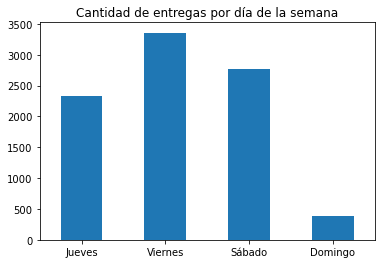

In [108]:
def entregas_por_dia_semana(year,month,datos):
    DayOfWeek = datos[datos.Year==year][datos.Month==month]['DayOfWeek'].value_counts().sort_index()
    indices = DayOfWeek.index.tolist()
    diassemana = ['Lunes','Martes','Miércoles','Jueves','Viernes','Sábado','Domingo']
    indices = [diassemana[i-1] for i in indices]
    DayOfWeek.index = indices
    DayOfWeek.plot(kind='bar',title='Cantidad de entregas por día de la semana',rot=0, legend=None)
    plt.savefig('tercera.png')

entregas_por_dia_semana(2020,1,datos)

In [152]:
def demora_promedio(year,month,datos):
    return datos['Shipment_Delay'].mean()

def distancia_prom(year,month,datos):
    return datos['Distance'].mean()

def distancia_max(year,month,datos):
    return datos['Distance'].max()

def distancia_min(year,month,datos):
    return datos['Distance'].min()

demora_promedio(2020,1,datos)

distancia_prom(2020,1,datos)

distancia_max(2020,1,datos)

distancia_min(2020,1,datos)

133

In [145]:
def source_mayor(year,month,datos):
    return datos['Source'].value_counts().nlargest(n=5)

def source_menor(year,month,datos):
    return datos['Source'].value_counts().nsmallest(n=5)
   
def destino_mayor(year,month,datos):
    return datos['Destination'].value_counts().nlargest(n=5)

def destino_menor(year,month,datos):
    return datos['Destination'].value_counts().nsmallest(n=5)

destino_mayor(2020,1,datos)

#destino_menor(2020,1,datos)
    
#source_mayor(2020,1,datos)

#source_menor(2020,1,datos)

LAS    665
MDW    585
PHX    540
BWI    459
OAK    393
Name: Destination, dtype: int64

In [161]:
datos['Carrier_Num'].value_counts().nlargest(n=5)
#datos['Carrier_Num'].value_counts().nsmallest(n=100)

1414    21
102     21
555     21
2361    20
806     20
Name: Carrier_Num, dtype: int64

In [142]:
def cant_entregas(year,month,datos):
    return datos.shape[0]

def cant_distancia(year,month,datos):
    return datos['Distance'].sum()

cant_distancia(2020,1,datos)

cant_entregas(2020,1,datos)

8999

In [160]:
print(datos['Source'].value_counts().to_string())

LAS    684
MDW    638
PHX    560
OAK    404
MCO    345
BWI    345
LAX    345
SAN    291
HOU    257
TPA    246
BNA    243
DAL    235
SMF    230
SJC    221
STL    207
MCI    200
ABQ    183
PHL    173
BUR    167
ONT    156
SLC    136
AUS    136
SAT    135
SEA    131
PDX    117
RNO    113
SNA    107
DEN    104
MSY    101
PVD     98
RDU     88
MHT     87
ISP     83
FLL     83
BHM     80
SFO     73
JAX     65
PIT     65
OKC     63
ELP     59
TUS     59
SDF     58
BOI     56
TUL     56
BDL     54
CMH     53
IND     48
BUF     48
OMA     44
ALB     40
LIT     39
PBI     38
LBB     37
ORF     37
DTW     37
MAF     34
CLE     33
RSW     33
AMA     32
GEG     31
JAN     26
IAD     23
HRL     20
CRP      9


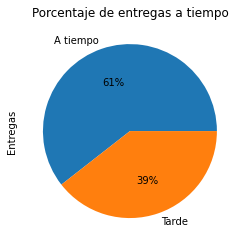

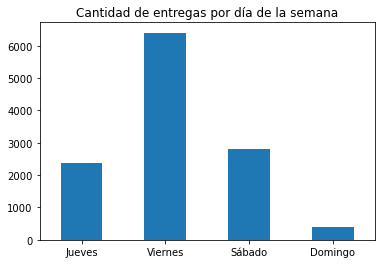

In [165]:
import re
import webbrowser
import os
import imgkit
def crear_reporte(year,month,datos):
    #Crear graficas y todos los datos
    entregas_a_tiempo_mes(year,month,datos)
    demoras(year,month,datos)
    entregas_por_dia_semana(year,month,datos)
    #generar reporte
    with open('Formato.html', 'r') as form:
        html = form.read()
    #se reemplazan todos los datos del html con los valores calculados
    meses = ['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']
    #titulo
    html = re.sub('%mes%',meses[month-1],html)
    #parrafo arriba
    html = re.sub('%cantentregas%',f'{cant_entregas(year,month,datos)}',html)
    html = re.sub('%cantmillas%',f'{cant_distancia(year,month,datos)}',html)
    html = re.sub('%mesatiempo%',f'{cant_entregas_a_tiempo_mes(year,month,datos)}',html)
    html = re.sub('%mestarde%',f'{cant_entregas_tarde_mes(year,month,datos)}',html)
    
    html = re.sub('%maslargo%',f'{distancia_max(year,month,datos)}',html)
    html = re.sub('%mascorto%',f'{distancia_min(year,month,datos)}',html)
    
    #Datos Generales
    html = re.sub('%valor1%',f'{demora_promedio(year,month,datos):.1f} minutos',html)
    html = re.sub('%valor2%',f'{distancia_prom(year,month,datos):.1f} millas',html)
    
    
    
    
    #sources mas populares
    pandatemp = source_mayor(2020,1,datos)
    for i in range(0,5):
        html = re.sub(f'%ciudad{i+1}%',f'{pandatemp.index[i]}',html)
        html = re.sub(f'%ciudad{i+1}cant%',f'{pandatemp[i]}',html)
        
    #sources menos populares
    pandatemp = source_menor(2020,1,datos)
    for i in range(0,5):
        html = re.sub(f'%ciudad{i+6}%',f'{pandatemp.index[i]}',html)
        html = re.sub(f'%ciudad{i+6}cant%',f'{pandatemp[i]}',html)
        
    #destinos mas populares
    pandatemp = destino_mayor(2020,1,datos)
    for i in range(0,5):
        html = re.sub(f'%ciudad{i+11}%',f'{pandatemp.index[i]}',html)
        html = re.sub(f'%ciudad{i+11}cant%',f'{pandatemp[i]}',html)
    
    #destinos menos populares
    pandatemp = destino_menor(2020,1,datos)
    for i in range(0,5):
        html = re.sub(f'%ciudad{i+16}%',f'{pandatemp.index[i]}',html)
        html = re.sub(f'%ciudad{i+16}cant%',f'{pandatemp[i]}',html)
    #Se añade todo al reporte
    temp = open('temp.html', 'w')
    temp.write(html)
    temp.close()
    #Se abre el reporte
    archivo = 'file:///'+os.path.realpath('temp.html')
    webbrowser.open_new_tab(archivo)
crear_reporte(2020,1,datos)

Loading page (1/2)
[>                                                           ] 0%
[======>                                                     ] 10%
QNetworkAccessFileBackendFactory: URL has no schema set, use file:// for files
QNetworkAccessFileBackendFactory: URL has no schema set, use file:// for files
QNetworkAccessFileBackendFactory: URL has no schema set, use file:// for files
QNetworkAccessFileBackendFactory: URL has no schema set, use file:// for files
[=======>                                                    ] 13%
[===========>                                                ] 19%
[===============>                                            ] 26%
[====================>                                       ] 34%
[============================================================] 100%
Rendering (2/2)                                                    
[>                                                           ] 0%
[===============>                                            ]

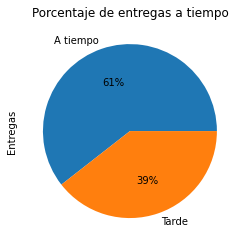

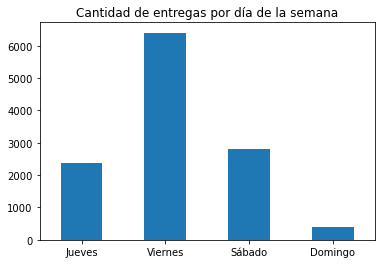

In [147]:
#se requiere instalar imgkit y wkthmltopdf
import imgkit



def crear_reporte_imagen(year,month,datos):
    crear_reporte(year,month,datos)
    
    path_wkthmltoimage = r'C:\Program Files\wkhtmltopdf\bin\wkhtmltoimage.exe'
    config = imgkit.config(wkhtmltoimage=path_wkthmltoimage)
    
    kitoptions = {
        "enable-local-file-access": None
    }
    imgkit.from_file('temp.html', 'out.jpg',config=config,options=kitoptions)
    
crear_reporte_imagen(2020,1,datos)

[2023-01-24 13:31:19] [INFO    ] discord.client: logging in using static token
[2023-01-24 13:31:19] [INFO    ] discord.client: logging in using static token
[2023-01-24 13:31:19] [INFO    ] discord.client: logging in using static token
[2023-01-24 13:31:20] [INFO    ] discord.gateway: Shard ID None has connected to Gateway (Session ID: 2da9d1d85717ac187c4946f62ceadbc9).
[2023-01-24 13:31:20] [INFO    ] discord.gateway: Shard ID None has connected to Gateway (Session ID: 2da9d1d85717ac187c4946f62ceadbc9).
[2023-01-24 13:31:20] [INFO    ] discord.gateway: Shard ID None has connected to Gateway (Session ID: 2da9d1d85717ac187c4946f62ceadbc9).


Ingresando como Chatbot#8513
mensaje--> $reporte
Loading page (1/2)
QNetworkAccessFileBackendFactory: URL has no schema set, use file:// for files
QNetworkAccessFileBackendFactory: URL has no schema set, use file:// for files
QNetworkAccessFileBackendFactory: URL has no schema set, use file:// for files
Rendering (2/2)                                                    
Done                                                               
mensaje--> 


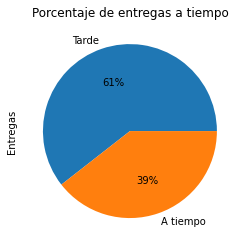

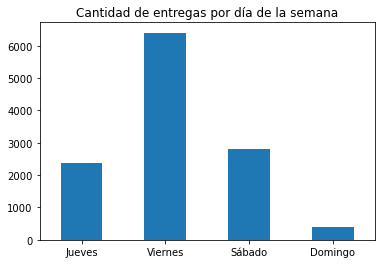

In [80]:
#integracion con discord
import discord
import nest_asyncio
import re
nest_asyncio.apply()

intents = discord.Intents.all()
client = discord.Client(command_prefix='!', intents=intents)

@client.event
async def on_ready():
    print('Ingresando como {0.user}'.format(client))
 
@client.event
async def on_message(message):
    print("mensaje-->", message.content)
    if message.author == client.user:
        return
    
    if message.content.startswith('$reporte'):
        crear_reporte_imagen(2020,1,datos)
        await message.channel.send(file=discord.File('out.jpg'))
 
client.run("MTA2MzYwODcyMDY0NDM5NTE2OA.GagVdB.THcxIetjPtGmt2pL5v9IDLDfxSI6mmlp07yVwc")